# Computing

In [1]:
library(AppliedPredictiveModeling)
data(solubility)
ls(pattern="^solT") #list object

Warning message:
"package 'AppliedPredictiveModeling' was built under R version 3.5.1"

[1] "solTestX"       "solTestXtrans"  "solTestY"       "solTrainX"     
[5] "solTrainXtrans" "solTrainY"

In [4]:
set.seed(2)
sample(names(solTrainX),8)
#colnames(solTrainX)

[1] "FP043"        "FP160"        "FP130"        "FP038"        "NumBonds"    
[6] "NumNonHAtoms" "FP029"        "FP185"

[1] "FP001"             "FP002"             "FP003"            
  [4] "FP004"             "FP005"             "FP006"            
  [7] "FP007"             "FP008"             "FP009"            
 [10] "FP010"             "FP011"             "FP012"            
 [13] "FP013"             "FP014"             "FP015"            
 [16] "FP016"             "FP017"             "FP018"            
 [19] "FP019"             "FP020"             "FP021"            
 [22] "FP022"             "FP023"             "FP024"            
 [25] "FP025"             "FP026"             "FP027"            
 [28] "FP028"             "FP029"             "FP030"            
 [31] "FP031"             "FP032"             "FP033"            
 [34] "FP034"             "FP035"             "FP036"            
 [37] "FP037"             "FP038"             "FP039"            
 [40] "FP040"             "FP041"             "FP042"            
 [43] "FP043"             "FP044"             "FP045"            
 [46] "FP046"             "FP047"             "FP048"            
 [49] "FP049"             "FP050"             "FP051"            
 [52] "FP052"             "FP053"             "FP054"            
 [55] "FP055"             "FP056"             "FP057"            
 [58] "FP058"             "FP059"             "FP060"            
 [61] "FP061"             "FP062"             "FP063"            
 [64] "FP064"             "FP065"             "FP066"            
 [67] "FP067"             "FP068"             "FP069"            
 [70] "FP070"             "FP071"             "FP072"            
 [73] "FP073"             "FP074"             "FP075"            
 [76] "FP076"             "FP077"             "FP078"            
 [79] "FP079"             "FP080"             "FP081"            
 [82] "FP082"             "FP083"             "FP084"            
 [85] "FP085"             "FP086"             "FP087"            
 [88] "FP088"             "FP089"             "FP090"            
 [91] "FP091"             "FP092"             "FP093"            
 [94] "FP094"             "FP095"             "FP096"            
 [97] "FP097"             "FP098"             "FP099"            
[100] "FP100"             "FP101"             "FP102"            
[103] "FP103"             "FP104"             "FP105"            
[106] "FP106"             "FP107"             "FP108"            
[109] "FP109"             "FP110"             "FP111"            
[112] "FP112"             "FP113"             "FP114"            
[115] "FP115"             "FP116"             "FP117"            
[118] "FP118"             "FP119"             "FP120"            
[121] "FP121"             "FP122"             "FP123"            
[124] "FP124"             "FP125"             "FP126"            
[127] "FP127"             "FP128"             "FP129"            
[130] "FP130"             "FP131"             "FP132"            
[133] "FP133"             "FP134"             "FP135"            
[136] "FP136"             "FP137"             "FP138"            
[139] "FP139"             "FP140"             "FP141"            
[142] "FP142"             "FP143"             "FP144"            
[145] "FP145"             "FP146"             "FP147"            
[148] "FP148"             "FP149"             "FP150"            
[151] "FP151"             "FP152"             "FP153"            
[154] "FP154"             "FP155"             "FP156"            
[157] "FP157"             "FP158"             "FP159"            
[160] "FP160"             "FP161"             "FP162"            
[163] "FP163"             "FP164"             "FP165"            
[166] "FP166"             "FP167"             "FP168"            
[169] "FP169"             "FP170"             "FP171"            
[172] "FP172"             "FP173"             "FP174"            
[175] "FP175"             "FP176"             "FP177"            
[178] "FP178"             "FP179"             "FP180"            
[181] "FP181"             "FP182"         

In [5]:
#find out missing values
any(is.na(solTrainX))

[1] FALSE

In [25]:
#skewness & distribution
#for predictors
library(e1071)
skew_info <- apply(solTrainX[209:228],2,skewness)
sort(skew_info,decreasing = T)
# for response 
sort(skewness(solTrainY),decreasing = T)

NumSulfer HydrophilicFactor       NumChlorine        NumHalogen 
        3.8354736         3.3984174         3.1729273         2.6872423 
        NumOxygen      SurfaceArea1       NumRotBonds       NumNitrogen 
        1.7688961         1.7114409         1.5749735         1.5516424 
     SurfaceArea2          NumAtoms          NumBonds       NumDblBonds 
        1.4727158         1.3623110         1.3579007         1.3574802 
      NumHydrogen          NumRings      NumNonHAtoms         MolWeight 
        1.2595533         1.0324447         0.9915112         0.9868244 
     NumNonHBonds         NumCarbon  NumAromaticBonds      NumMultBonds 
        0.9677742         0.9258765         0.7943773         0.6691816

[1] -0.6693161

No id variables; using all as measure variables


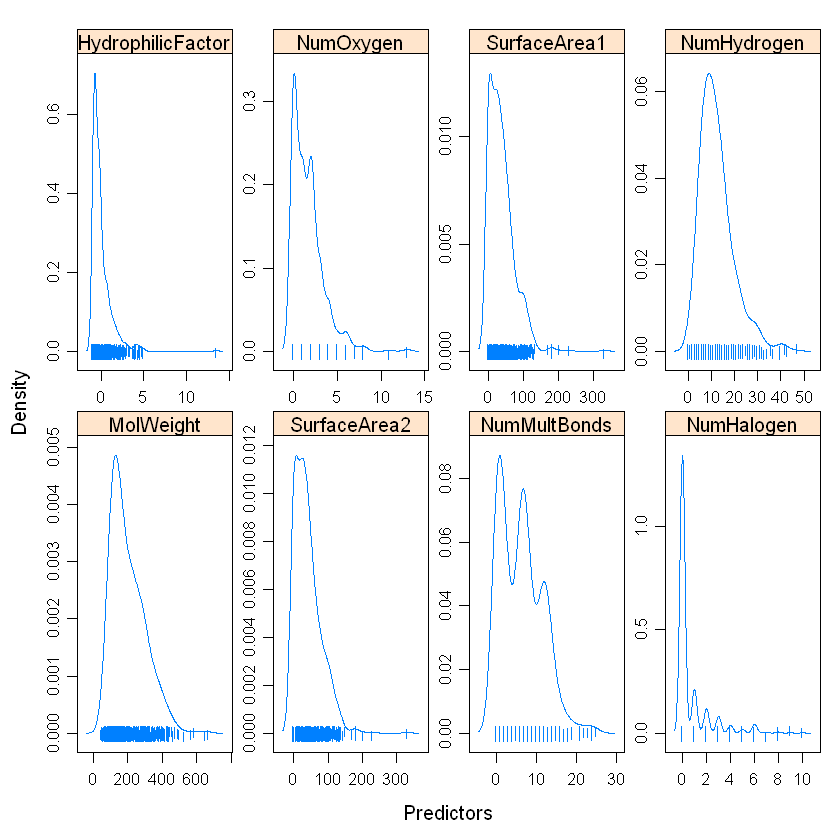

In [23]:
#visualize
sample_col <- solTrainX[,sample(209:228,8)]
library(reshape2)
mlt <- melt(sample_col)
library(lattice)
densityplot(~value|variable,data=mlt,
           scales=list(x=list(relation="free"),y=list(relation="free")),
           adjust=1.25,pch="|",xlab="Predictors",layout=c(4,2))

In [26]:
#does Box-Cox trans fix some skewness?
skew_info_cox <- apply(solTrainXtrans[209:228],2,skewness)
sort(skew_info_cox,decreasing = T)

NumSulfer       NumChlorine        NumHalogen       NumNitrogen 
     2.2707457390      1.4673236666      1.0331764976      0.4262727429 
        NumOxygen       NumDblBonds HydrophilicFactor       NumRotBonds 
     0.1870352249      0.1496862360      0.1003040295      0.0973568321 
        NumCarbon      NumNonHBonds          NumRings         MolWeight 
     0.0616443828      0.0432437801      0.0055727736     -0.0002162255 
      NumHydrogen      NumNonHAtoms          NumAtoms      NumMultBonds 
    -0.0407015938     -0.0555982369     -0.0713055864     -0.0946655258 
     SurfaceArea1  NumAromaticBonds      SurfaceArea2          NumBonds 
    -0.1316118434     -0.1463815894     -0.1681548297     -0.1881635919

In [27]:
#is YeoJohnson trans  better than Box-Cos?
library(caret)
trans_yeo <- preProcess(solTrainX[,209:228],method="YeoJohnson")
solTrainXtrans_yeo <- predict(trans_yeo,newdata = solTrainX[,209:228])
sort(apply(solTrainXtrans_yeo,2,skewness),decreasing = T)

NumSulfer       NumChlorine        NumHalogen       NumNitrogen 
     3.8354735644      3.1729272633      1.0067642743      0.4286810332 
HydrophilicFactor       NumDblBonds         NumOxygen       NumHydrogen 
     0.2492718016      0.1584856832      0.0414896755      0.0290729312 
      NumRotBonds          NumBonds          NumAtoms          NumRings 
     0.0208437271      0.0054580497      0.0014240713      0.0009134123 
        MolWeight      NumNonHAtoms         NumCarbon      NumNonHBonds 
    -0.0002162255     -0.0038745321     -0.0042561518     -0.0132954797 
 NumAromaticBonds      NumMultBonds      SurfaceArea1      SurfaceArea2 
    -0.0845954241     -0.1418027368     -0.2343397620     -0.2451259489

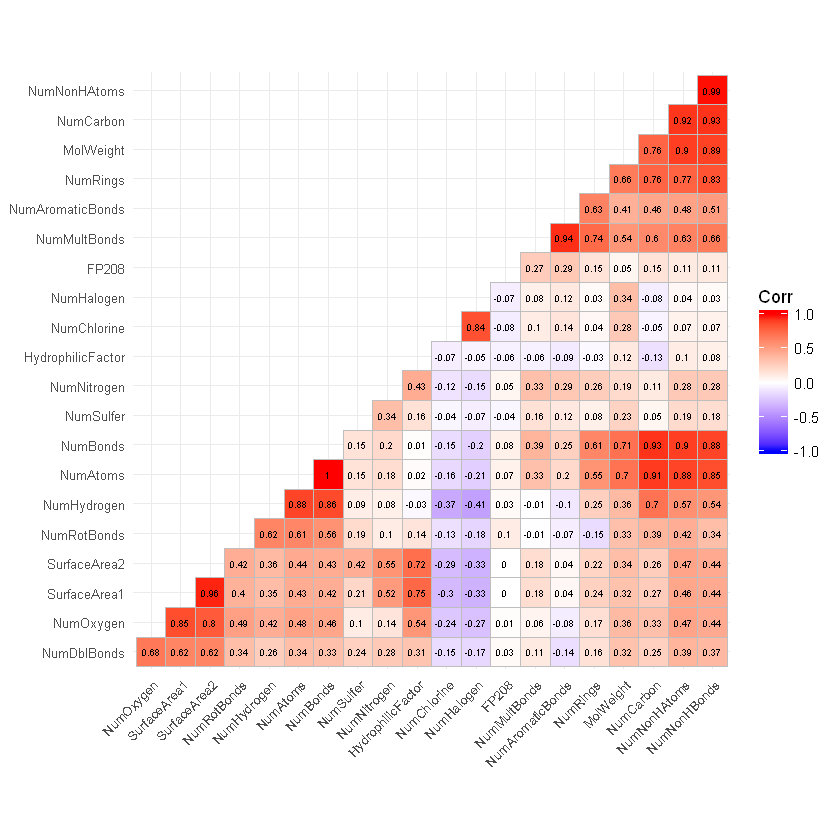

In [48]:
#how is the corr
# library(corrplot)
# corrplot(cor(solTrainXtrans[,208:228]), type="upper",order = "hclust", addgrid.col = NA, tl.pos = "n")
library(ggcorrplot)
ggcorrplot(round(cor(solTrainXtrans[,208:228]),2), hc.order = TRUE, type = "lower", lab = TRUE,lab_size = 2,tl.cex = 8)
#some  correlations are extremly high

## Ordinary Linear Regression

In [49]:
trn <- solTrainXtrans
trn$Solubility <- solTrainY

#fit_lm <- train(Solubility~.,data=trn,method = "lm")
fit_lm <- lm(Solubility~.,data=trn)
summary(fit_lm)


Call:
lm(formula = Solubility ~ ., data = trn)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.75620 -0.28304  0.01165  0.30030  1.54887 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.431e+00  2.162e+00   1.124 0.261303    
FP001              3.594e-01  3.185e-01   1.128 0.259635    
FP002              1.456e-01  2.637e-01   0.552 0.580960    
FP003             -3.969e-02  1.314e-01  -0.302 0.762617    
FP004             -3.049e-01  1.371e-01  -2.223 0.026520 *  
FP005              2.837e+00  9.598e-01   2.956 0.003223 ** 
FP006             -6.886e-02  2.041e-01  -0.337 0.735917    
FP007              4.044e-02  1.152e-01   0.351 0.725643    
FP008              1.121e-01  1.636e-01   0.685 0.493331    
FP009             -8.242e-01  8.395e-01  -0.982 0.326536    
FP010              4.193e-01  3.136e-01   1.337 0.181579    
FP011              5.158e-02  2.198e-01   0.235 0.814503    
FP012             -1.346e-02  1.611e-01 

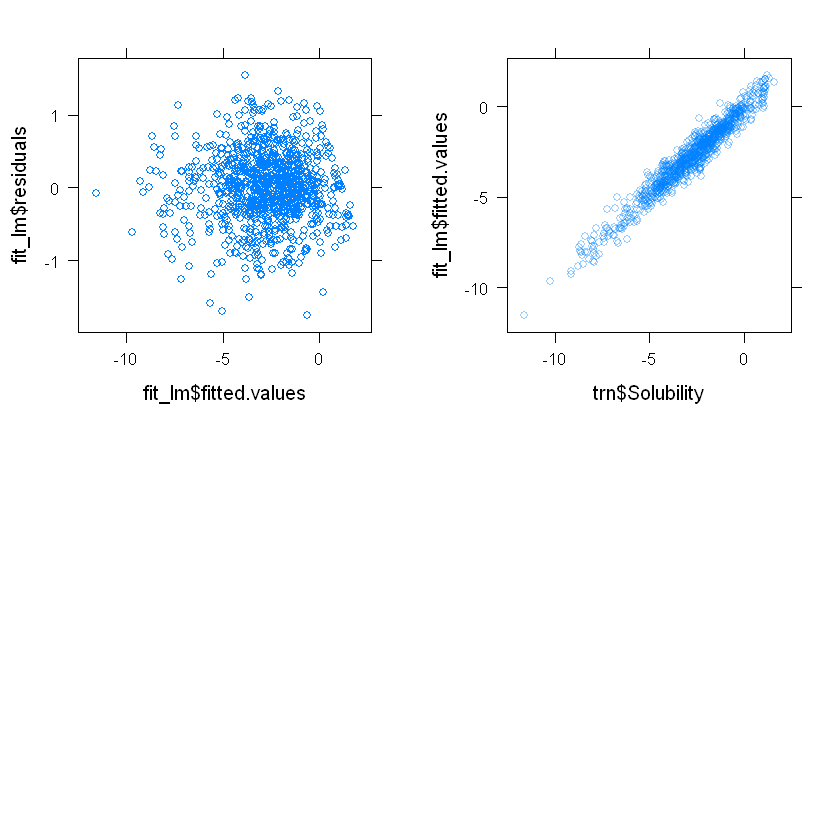

In [68]:
library(lattice)
p1 <- xyplot(fit_lm$residuals~fit_lm$fitted.values)
p2 <- xyplot(fit_lm$fitted.values~trn$Solubility,alpha=0.4)

library(gridExtra)
grid.arrange(p1, p2, ncol=2,nrow=2)

In [62]:
library(caret)
cat("olm RMSE",round(RMSE(pred = fit_lm$fitted.values,obs=trn$Solubility),2))
cat("\n")
cat("olm R2",round(R2(pred = fit_lm$fitted.values,obs=trn$Solubility),2))

olm RMSE 0.48
olm R2 0.94

In [63]:
#apply on test set
pred_lm <- predict(fit_lm,newdata = solTestXtrans)
values_lm <- data.frame(obs=solTestY,pred=pred_lm)
defaultSummary(values_lm)

RMSE  Rsquared       MAE 
0.7455802 0.8722236 0.5497605

In [70]:
#robust linear regression
library(MASS)
fit_rlm <- rlm(Solubility~.,data=trn)
#summary(fit_rlm)
values_rlm_trn <- data.frame(obs=solTrainY,pred=fit_rlm$fitted.values)
defaultSummary(values_rlm_trn)

pred_rlm <- predict(fit_rlm,newdata = solTestXtrans)
values_rlm_test <- data.frame(obs=solTestY,pred=pred_rlm)
defaultSummary(values_rlm_test)

RMSE  Rsquared       MAE 
0.4973767 0.9409034 0.3552903

RMSE  Rsquared       MAE 
0.7529670 0.8700394 0.5371296

In [73]:
#hypothesis testing  on model performance
t.test (fit_lm$residuals, fit_rlm$residuals)


	Welch Two Sample t-test

data:  fit_lm$residuals and fit_rlm$residuals
t = 0.44908, df = 1898, p-value = 0.6534
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.03395309  0.05412010
sample estimates:
    mean of x     mean of y 
-1.207965e-17 -1.008350e-02 


In [74]:
#caret wrapper
library(caret)
ctrl <- trainControl(method = "cv",number=10)
set.seed(100)
fit_lm_cv <- train(x=solTrainXtrans,y=solTrainY,method = "lm",trControl = ctrl)
fit_lm_cv
#prediction from a rank-deficient fit may be misleading

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"

Linear Regression 

951 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 856, 856, 855, 855, 857, 856, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.6926348  0.8872058  0.5199216

Tuning parameter 'intercept' was held constant at a value of TRUE

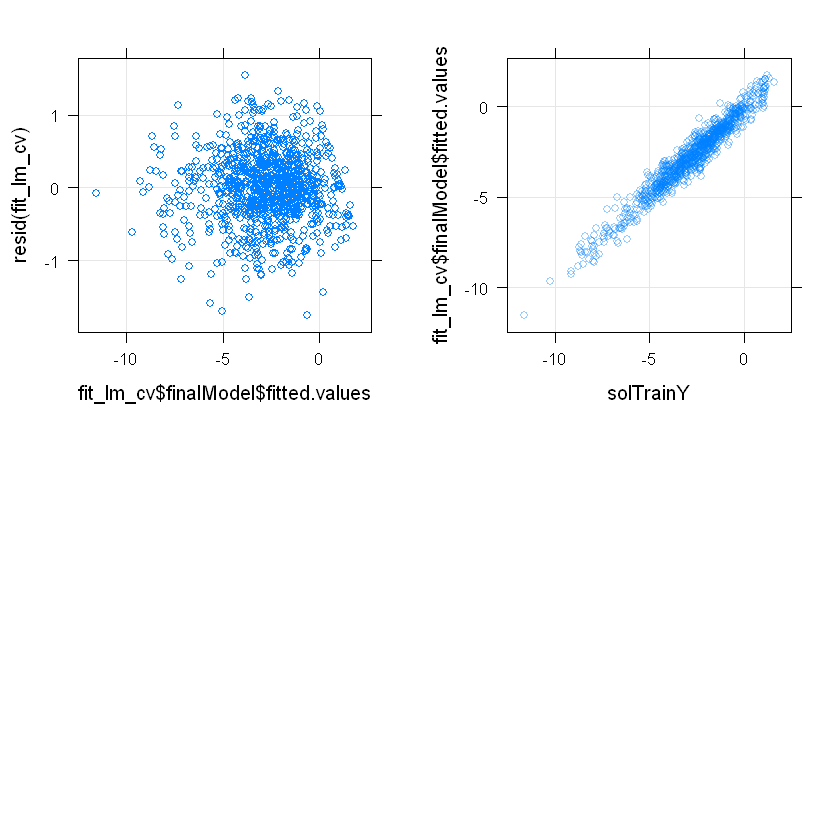

In [93]:
p1 <- xyplot(resid(fit_lm_cv)~fit_lm_cv$finalModel$fitted.values,type=c("p","g"))
p2 <- xyplot(fit_lm_cv$finalModel$fitted.values~solTrainY,alpha=0.4,type=c("p","g"))
library(gridExtra)
grid.arrange(p1, p2, ncol=2,nrow=2)   

In [94]:
#get rid of predictors with high correlations
high_cor <- findCorrelation(cor(solTrainXtrans),.90)
cor_info <- names(solTrainXtrans)[high_cor]
trn_flt_cor <- solTrainXtrans[,-high_cor]
#vld_flt_cor <- solTestXtrans[,-high_cor]

In [95]:
set.seed(100)
fit_lm_flt <- train(x=trn_flt_cor,y=solTrainY,method = "lm",trControl = ctrl)
fit_lm_flt

Linear Regression 

951 samples
190 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 856, 856, 855, 855, 857, 856, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.6980579  0.8857871  0.5251033

Tuning parameter 'intercept' was held constant at a value of TRUE

In [96]:
set.seed(100)
fit_rlm_pca <- train(Solubility~.,data=trn,method = "rlm",preProcess="pca",trControl = ctrl) 
fit_rlm_pca
#'rlm' failed to converge in 20 steps

Warning message in rlm.default(x, y, weights, method = method, wt.method = wt.method, :
"'rlm' failed to converge in 20 steps"Warning message in rlm.default(x, y, weights, method = method, wt.method = wt.method, :
"'rlm' failed to converge in 20 steps"

Robust Linear Model 

951 samples
228 predictors

Pre-processing: principal component signal extraction (228), centered
 (228), scaled (228) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 856, 856, 855, 855, 857, 856, ... 
Resampling results across tuning parameters:

  intercept  psi           RMSE       Rsquared   MAE      
  FALSE      psi.huber     2.8245812  0.8561008  2.7155082
  FALSE      psi.hampel    2.8245118  0.8561763  2.7154817
  FALSE      psi.bisquare  2.8244621  0.8562213  2.7154216
   TRUE      psi.huber     0.7828457  0.8550937  0.5970333
   TRUE      psi.hampel    0.7825426  0.8552118  0.5972415
   TRUE      psi.bisquare  0.7903976  0.8524410  0.6016888

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were intercept = TRUE and psi = psi.hampel.

## Partial Least Squares &#x1F4C8; 


In [102]:
library(pls)
fit_pls <- plsr(Solubility~.,data=trn)

In [103]:
RMSE(pred = fit_pls$fitted.values,obs = trn$Solubility)

[1] 0.5182724

In [104]:
set.seed(100)
fit_pls_cv <- train(solTrainXtrans,solTrainY,methon="pls",
                   tuneLength=20,trControl=trainControl(method = "cv",number=10),preProc=c("center","scale"))

In [107]:
fit_pls_cv

Random Forest 

951 samples
228 predictors

Pre-processing: centered (228), scaled (228) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 856, 856, 855, 855, 857, 856, ... 
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared   MAE      
    2   1.0505015  0.8224257  0.8142647
   13   0.6933720  0.8904809  0.5148794
   25   0.6696837  0.8953084  0.4896038
   37   0.6640067  0.8958659  0.4811551
   49   0.6589740  0.8972706  0.4784048
   61   0.6559895  0.8977903  0.4739872
   73   0.6548066  0.8978891  0.4745866
   85   0.6551074  0.8976312  0.4734358
   97   0.6555072  0.8972762  0.4769914
  109   0.6582658  0.8962647  0.4768649
  120   0.6547261  0.8973713  0.4728629
  132   0.6582670  0.8959942  0.4769243
  144   0.6558668  0.8969383  0.4756614
  156   0.6545273  0.8971995  0.4757197
  168   0.6572835  0.8961775  0.4765139
  180   0.6532271  0.8975140  0.4741868
  192   0.6570959  0.8963698  0.4764060
  204   0.6597251  0.8954294  0.4776658
  216

In [109]:
RMSE(pred = fit_pls_cv$finalModel$predicted,obs = solTrainY)

[1] 0.6484356

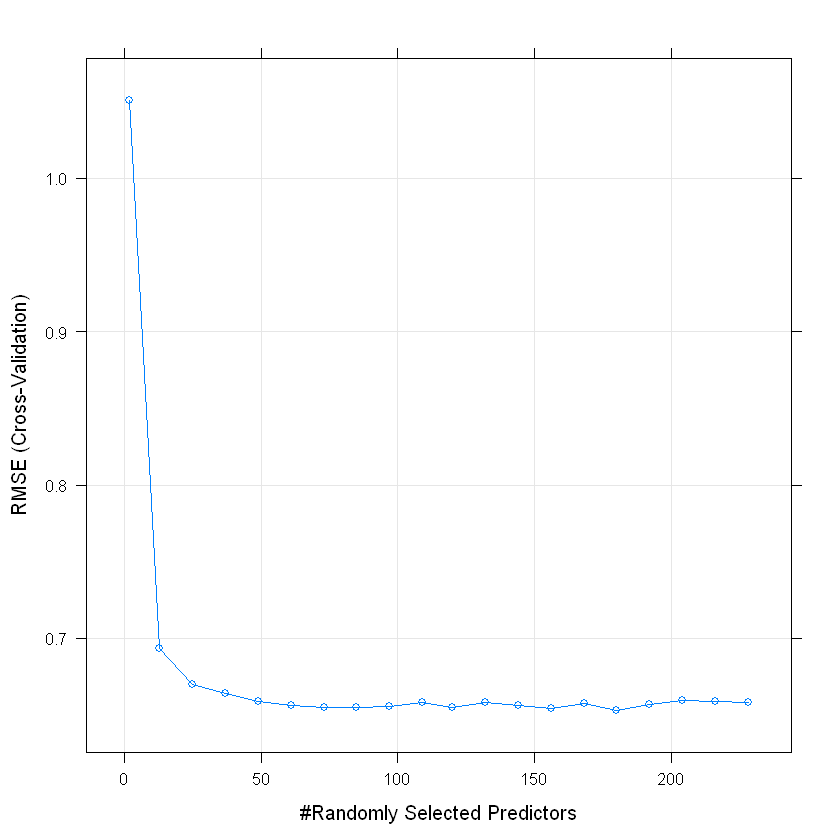

In [110]:
plot(fit_pls_cv)

## Penalized Regression Models

In [111]:
#ridge model
library(elasticnet)
fit_ridge <- enet(x=as.matrix(solTrainXtrans),y=solTrainY,lambda=0.001)

In [117]:
pred_ridge <- predict(fit_ridge,newx = as.matrix(solTestXtrans),
                      s=1,mode="fraction",type="fit")

head(pred_ridge$fit)
RMSE(pred = pred_ridge$fit,obs = solTestY)

20          21          23          25          28          31 
 0.96795590  0.06918538 -0.54365077  0.96072014 -0.03594693  1.59284535

[1] 0.7477972

In [118]:
#ridge model
library(caret)
grid_ridge <- data.frame(.lambda=seq(0,.1,length=15))
set.seed(100)
fit_ridge <- train(solTrainXtrans,solTrainY,method="ridge",
                  tuneGrid=grid_ridge,trControl=trainControl(method = "cv",number=10),
                  preProc=c("center","scale"))

In [120]:
(fit_ridge)

Ridge Regression 

951 samples
228 predictors

Pre-processing: centered (228), scaled (228) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 856, 856, 855, 855, 857, 856, ... 
Resampling results across tuning parameters:

  lambda       RMSE       Rsquared   MAE      
  0.000000000  0.6923558  0.8872977  0.5194817
  0.007142857  0.6842051  0.8901855  0.5180204
  0.014285714  0.6782572  0.8924345  0.5135023
  0.021428571  0.6763196  0.8933364  0.5129646
  0.028571429  0.6761659  0.8936611  0.5137609
  0.035714286  0.6770285  0.8936769  0.5150076
  0.042857143  0.6785555  0.8935075  0.5169778
  0.050000000  0.6805575  0.8932196  0.5190373
  0.057142857  0.6829220  0.8928530  0.5213703
  0.064285714  0.6855755  0.8924331  0.5238093
  0.071428571  0.6884742  0.8919761  0.5263585
  0.078571429  0.6915802  0.8914943  0.5290529
  0.085714286  0.6948706  0.8909958  0.5318508
  0.092857143  0.6983276  0.8904864  0.5347012
  0.100000000  0.7019378  0.8899703  0.5375828

RMSE was 

In [122]:
#lasso model
library(elasticnet)
fit_lasso <- enet(x=as.matrix(solTrainXtrans),y=solTrainY,lambda=0.01,normalize = T)

In [123]:
pred_lasso <- predict(fit_lasso,newx = as.matrix(solTestXtrans),
                      s=.1,mode="fraction",type="fit")

In [124]:
head(pred_lasso$fit)
RMSE(pred = pred_lasso$fit,obs = solTestY)

20          21          23          25          28          31 
-0.60186178 -0.42226814 -1.20465564 -1.23652963 -1.25023517 -0.05587631

[1] 1.135331

In [16]:
coef_lasso <- predict(fit_lasso,newx = as.matrix(solTestXtrans),
                      s=.1,mode="fraction",type="coefficients")

tail(coef_lasso$coefficients)

NumChlorine        NumHalogen          NumRings HydrophilicFactor 
       0.00000000        0.00000000        0.00000000        0.12678967 
     SurfaceArea1      SurfaceArea2 
       0.09035596        0.00000000

In [17]:
grid_net <- expand.grid(.lambda=c(0,0.01,.1),
                       .fraction=seq(.05,1,length=20))
set.seed(100)

tune_net <- train(solTrainXtrans,solTrainY,method="enet",
                 tuneGrid=grid_net,trControl=trainControl(method = "cv",number=10),
                 preProc=c("center","scale"))

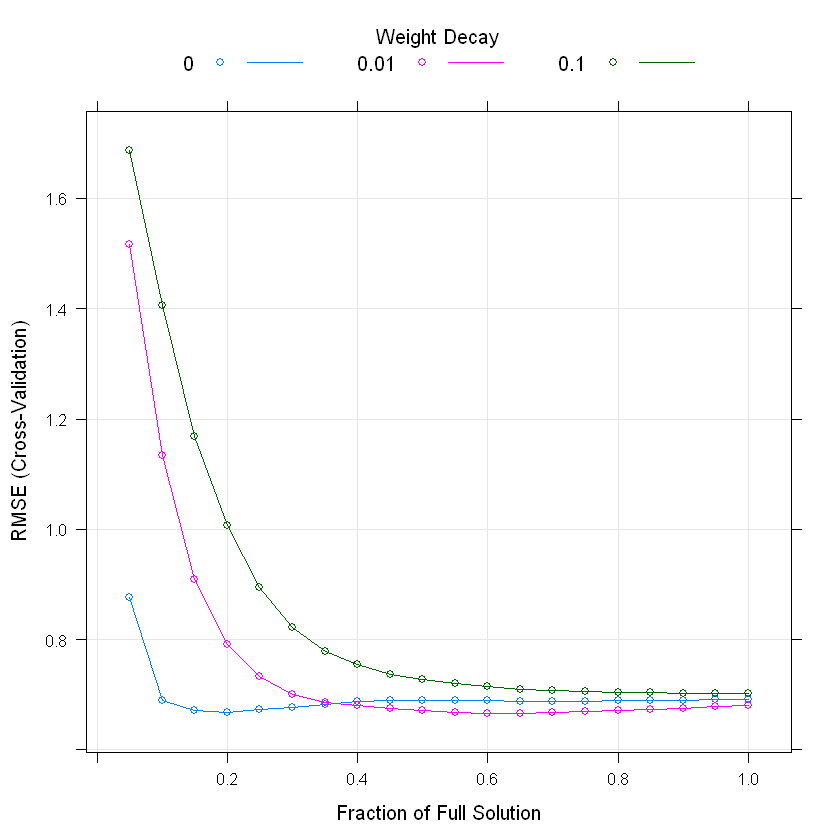

In [18]:
plot(tune_net)